Source:   
https://www.youtube.com/watch?v=SSFd6UHjxII

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
%matplotlib inline
rcParams['figure.figsize']=7,4
sb.set_style('whitegrid')

In [29]:
from sklearn import datasets
# import some data to play with

iris= datasets.load_iris()

X = iris.data[:, [1,2]]  # only take two features
y = iris.target

#columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']
columns=['Sepal Width','Petal Length']
df = pd.DataFrame(data=X,columns=columns)
df.head()


,Sepal Width,Petal Length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [71]:
model = DBSCAN(eps=0.5, min_samples=19).fit(X)
model

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)

In [72]:
outliers_df = pd.DataFrame(df)

print(Counter(model.labels_))
outliers_df[model.labels_==-1].head(4)

Counter({1: 91, 0: 48, -1: 11})


,Sepal Width,Petal Length
15,4.4,1.5
41,2.3,1.3
57,2.4,3.3
60,2.0,3.5


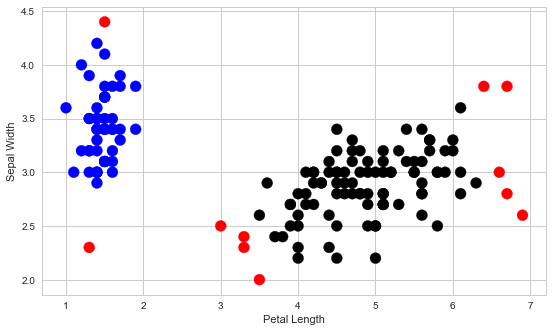

In [75]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_
#colors = ['r','b','orange']

def labels_to_colors(x):
    if x == -1:
        return 'red'
    elif x == 0 :
        return 'blue'
    elif x == 1:
        return 'black'
    else:
        return 'grey'

colors = list(colors)
colors = list(map(lambda x: labels_to_colors(x), colors))


x = X[:,1]
y = X[:,0]
ax.scatter(x,y,c=colors,s=120,marker='o')

ax.set_xlabel(columns[1])
ax.set_ylabel(columns[0])